$(0,1)$
- Differences: $21<x2<131, 94<x1<308$ (22 instances)
- R: $x2>21, x1>-34$
    - CF: $x2≤21 \rightarrow (0,0)$
    - RL: $x2≤131, x1≥94$
        - CF: $x2≥189 \rightarrow (1,1)$
        - CF: $x1≤81 \rightarrow (1,1)$
        - RLL: $x2≥78, x1≥207$ (6 instances different)
            - CF: $x2≥146 \rightarrow (1,1)$
            - CF: $x1≤158 \rightarrow (1,1)$
        - RLR: $x2≤71$ (16 instances different)

$(1,0)$
- Differences: $-28<x2<20, -44<x1<63$ (15 instances)
- R: $x2<20$
    - CF: $x2≥22 \rightarrow (1,1)$
    - RL: $x2≥-28, -44<x1<63$
        - CF: $x2≤-71 \rightarrow (0,0)$
        - CF: $x1≤-17 \rightarrow (0,0)$
        - CF: $x1≥78 \rightarrow (0,0)$
        - RLL: $x2≥11, x1≥-13$ (5 instances different)
            - CF: $x2≤-49 \rightarrow (0,0)$
        - RLR: $x2<-3, x1<32$ (10 instances different)
            - CF: $x1≥48 \rightarrow (0,0)$

In [2]:
import matplotlib.pyplot as plt
import shap
import pickle
import cloudpickle
import numpy as np
import scipy as sp
import pandas as pd
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering, plot_dendrogram
from tasks.feature_ignored import make_task
shap.initjs()
%matplotlib inline

# Setup Task

In [3]:
clf_a, clf_b, X, y, feature_names = make_task()

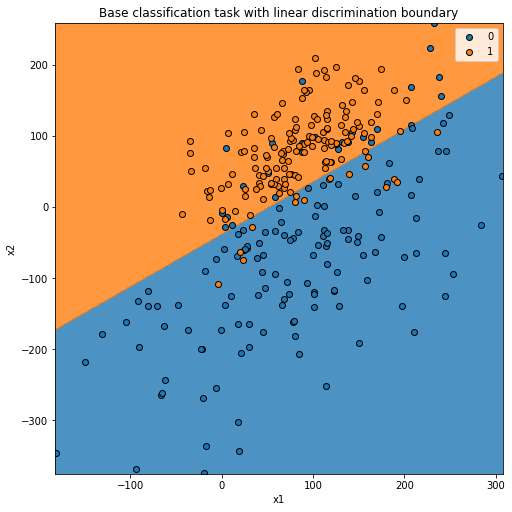

In [5]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Base classification task with linear discrimination boundary', feature_names,
                       predict=clf_a.predict, class_names=clf_a.classes_,
                       fig=fig, ax=ax)

In [6]:
comparer = ModelComparer(clf_a, clf_b, feature_names)
comparer.fit(X, y)

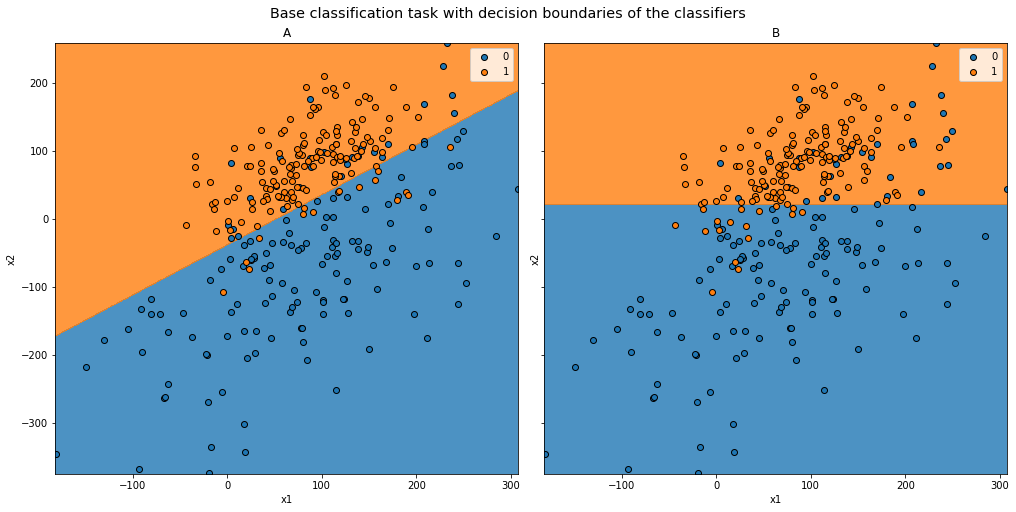

In [7]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label')

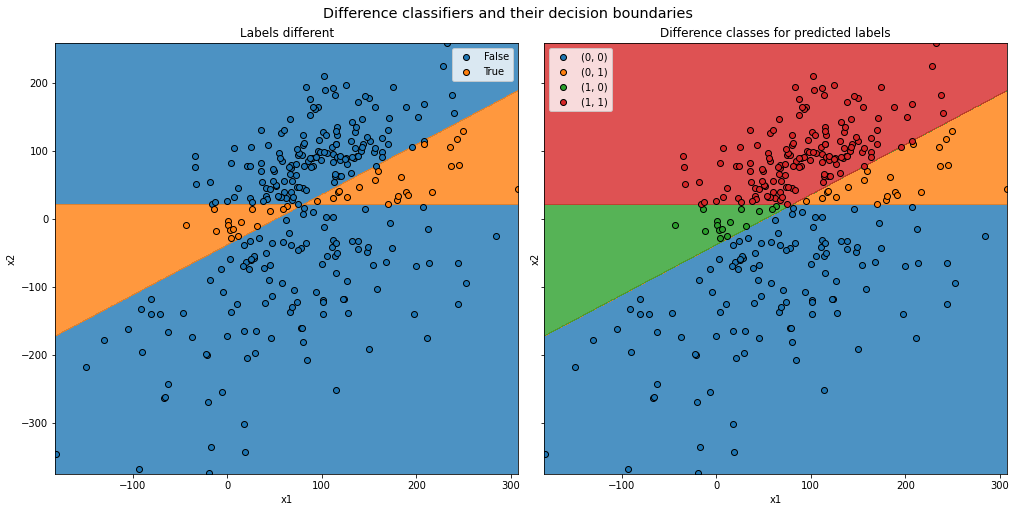

In [8]:
comparer.plot_decision_boundaries(X)

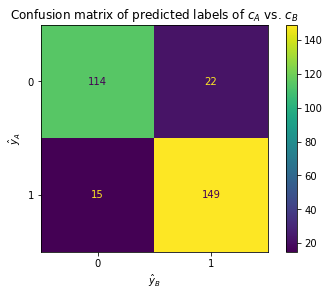

In [9]:
comparer.plot_confusion_matrix(X)

In [10]:
%%time
masker = shap.maskers.Independent(data=X, max_samples=X.shape[0])
explanations, indices_nonfinite_predictions, explanations_nonfinite = \
    generate_shap_explanations(comparer, X, masker=masker,
                               explanation_types=['indiv', 'indiv_diff', 'mclass_diff'],
                               space_types=['labels'])
with open('shap.expl', 'wb') as f:
    pickle.dump((explanations, indices_nonfinite_predictions, explanations_nonfinite, comparer),
                f, pickle.HIGHEST_PROTOCOL)

CPU times: user 5.89 s, sys: 162 ms, total: 6.06 s
Wall time: 6.77 s


In [11]:
explanations.shape, indices_nonfinite_predictions.shape, explanations_nonfinite.shape

((300, 2), (0,), (0,))

In [12]:
xlim = explanations.data[:, 0].min() - 0.5, explanations.data[:, 0].max() + 0.5
ylim = explanations.data[:, 1].min() - 0.5, explanations.data[:, 1].max() + 0.5

# Traditional SHAP Explanations

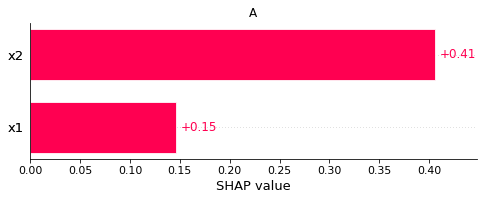

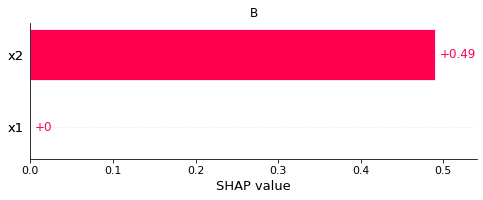

In [13]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.labels.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.labels.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [14]:
feature_order, _ = calc_feature_order(explanations.indiv.labels[:, :, 1])

In [15]:
node, Z = make_clustering(comparer, explanations.indiv.labels[:, :, 1])

root
(1, 1)    149
(0, 0)    114
(0, 1)     22
(1, 0)     15
dtype: int64


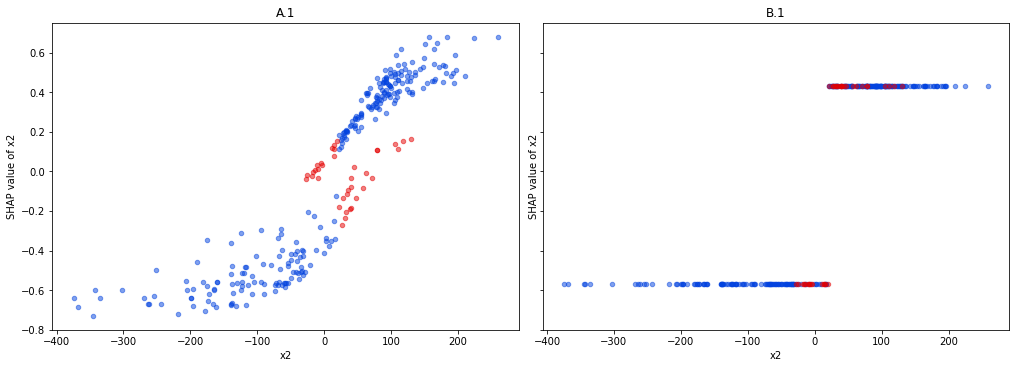

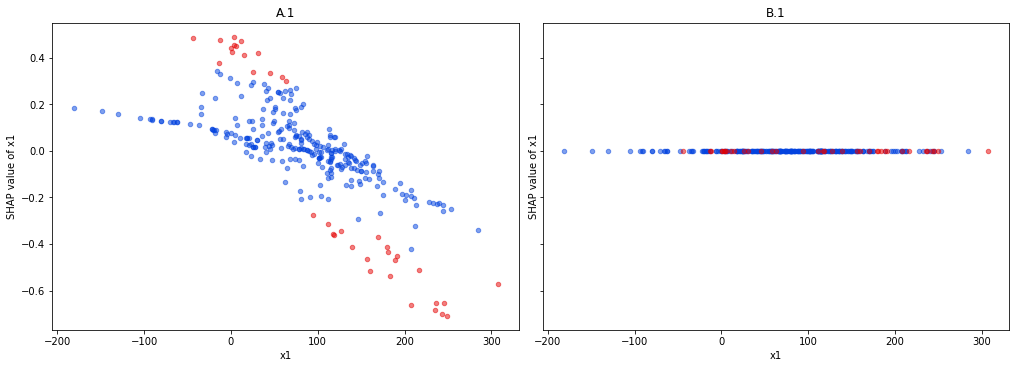

In [16]:
for feature in feature_order:
    node.plot_feature(feature, alpha=0.5)

# Difference Classifier SHAP Explanations

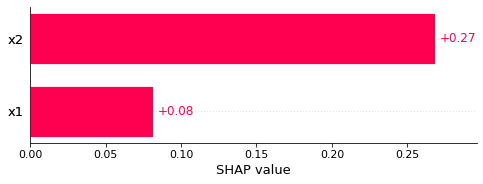

In [17]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.labels)
plot_feature_importance_bar(feature_importances)

In [18]:
global_feature_order = feature_order

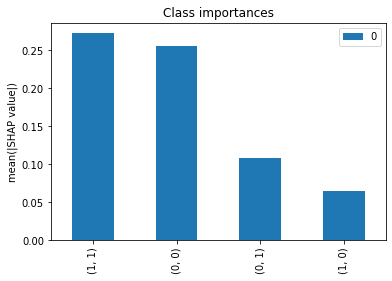

In [19]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.labels)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

## Clustering of Class $(0,1)$ SHAP Values

In [20]:
node, Z = make_clustering(comparer, explanations.mclass_diff.labels, '(0, 1)', ['(0, 0)', '(0, 1)', '(1, 1)'])

root
(1, 1)    149
(0, 0)    114
(0, 1)     22
(1, 0)     15
dtype: int64


### Root Node

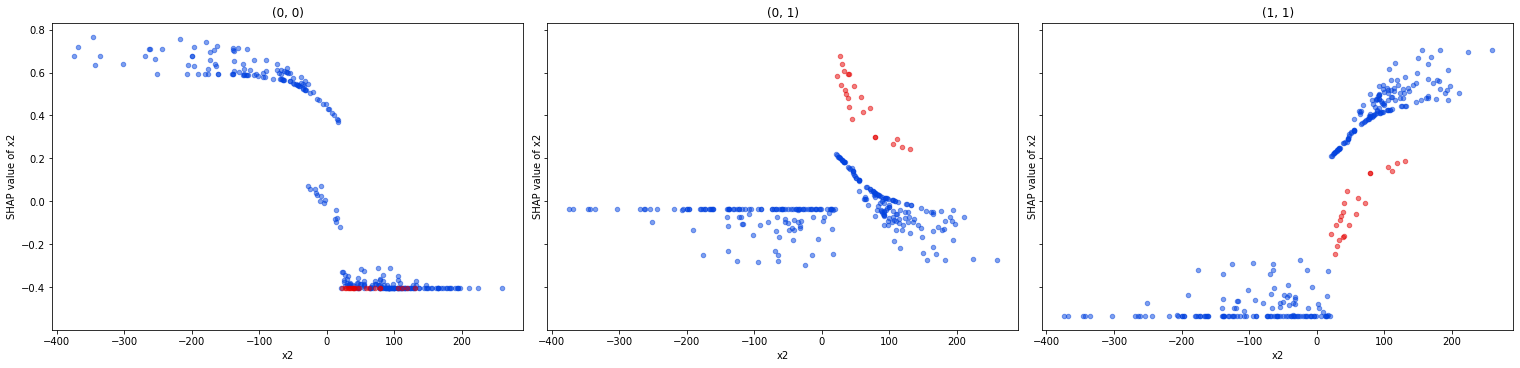

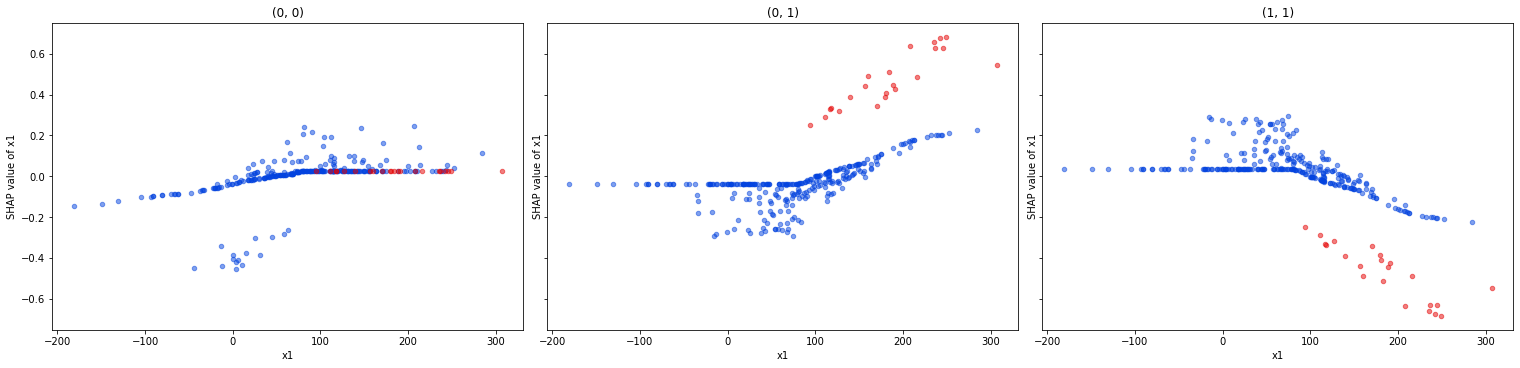

In [21]:
for feature in global_feature_order:
    node.plot_feature(feature, alpha=0.5)

In [22]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,300.000000,22.000000
mean,84.138769,84.138769,184.481336
std,77.917955,77.917955,54.563787
min,-181.190181,-181.190181,94.553614
25%,35.786394,35.786394,143.743566
50%,83.158128,83.158128,182.078051
75%,131.776480,131.776480,230.714859
max,307.157526,307.157526,307.157526


In [23]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,300.000000,22.000000
mean,9.979408,9.979408,57.725000
std,117.978412,117.978412,32.546365
min,-374.445022,-374.445022,21.713221
25%,-59.339309,-59.339309,34.183800
50%,34.019343,34.019343,42.208430
75%,93.596696,93.596696,76.548554
max,258.940851,258.940851,130.025070


### Node R

In [25]:
node = node.get_right()

R
(1, 1)    149
(0, 1)     22
dtype: int64


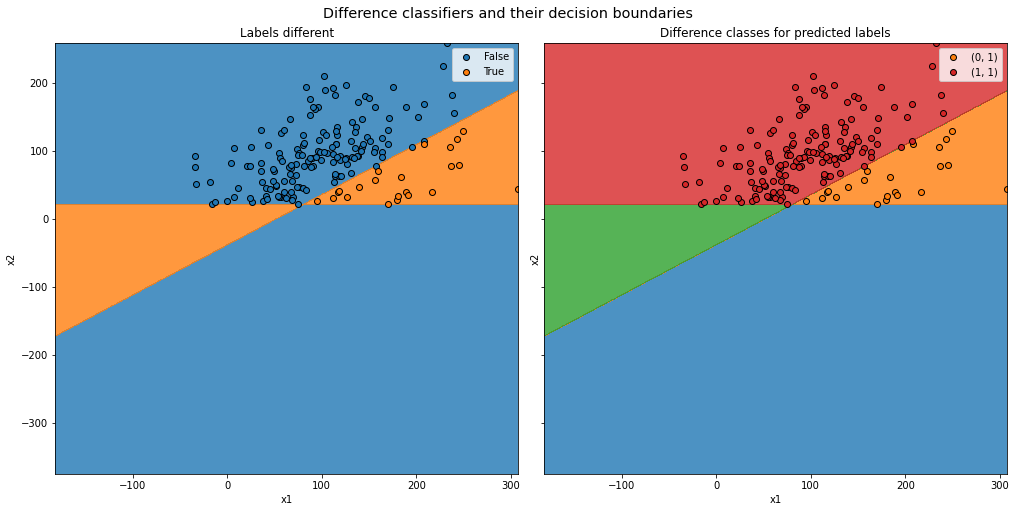

In [26]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

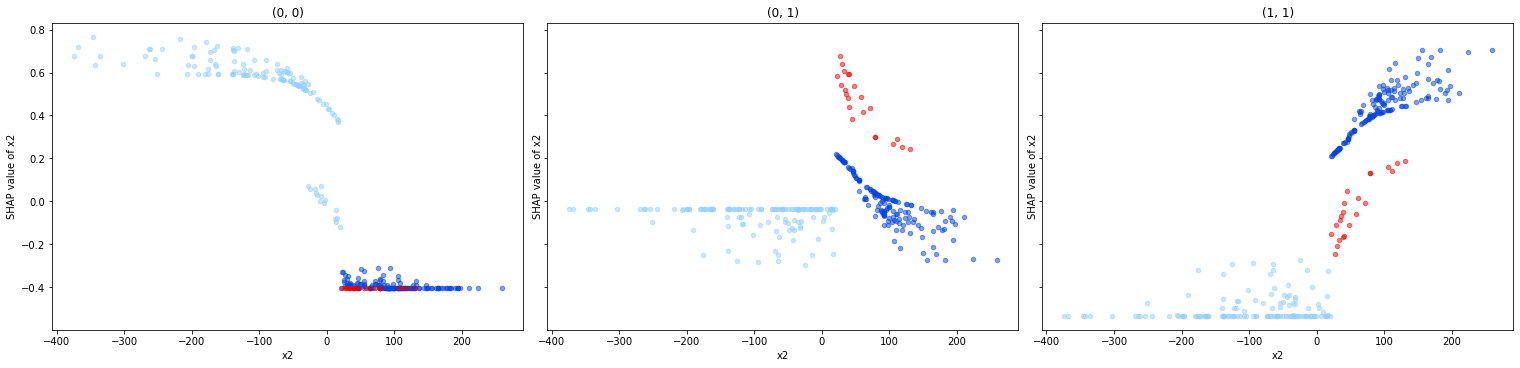

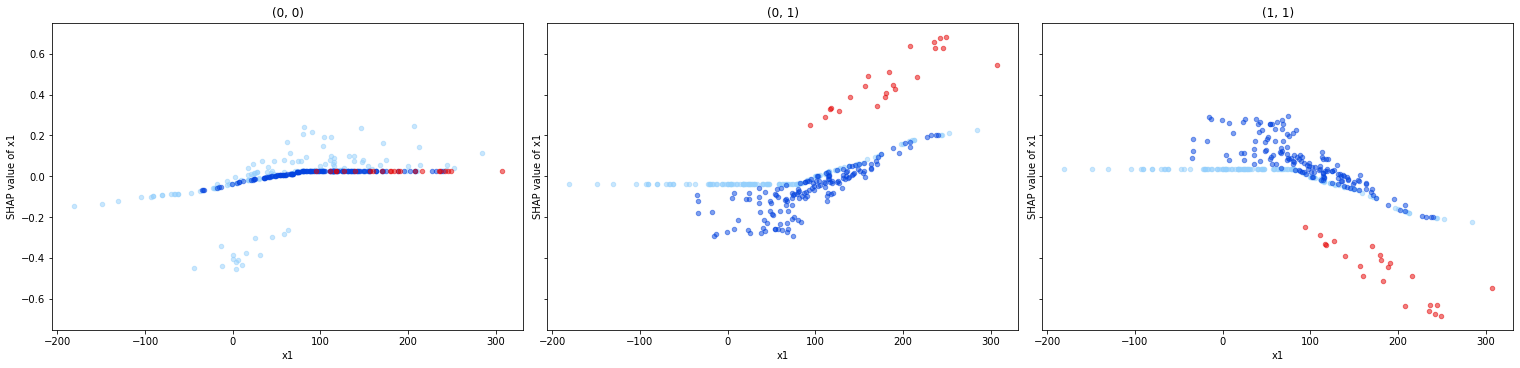

In [27]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [29]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,171.000000,22.000000
mean,9.979408,92.775562,57.725000
std,117.978412,47.947798,32.546365
min,-374.445022,21.408908,21.713221
25%,-59.339309,54.637883,34.183800
50%,34.019343,89.738143,42.208430
75%,93.596696,116.996654,76.548554
max,258.940851,258.940851,130.025070


In [30]:
node.test(x2=21)

,before,after
"(0, 0)",NaN,22.0
"(0, 1)",22.0,NaN


In [28]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,171.000000,22.000000
mean,84.138769,106.054097,184.481336
std,77.917955,62.951537,54.563787
min,-181.190181,-34.549289,94.553614
25%,35.786394,65.666989,143.743566
50%,83.158128,102.564420,182.078051
75%,131.776480,141.809815,230.714859
max,307.157526,307.157526,307.157526


### Node RL

In [55]:
node = node.get_left()

RL
(0, 1)    22
dtype: int64


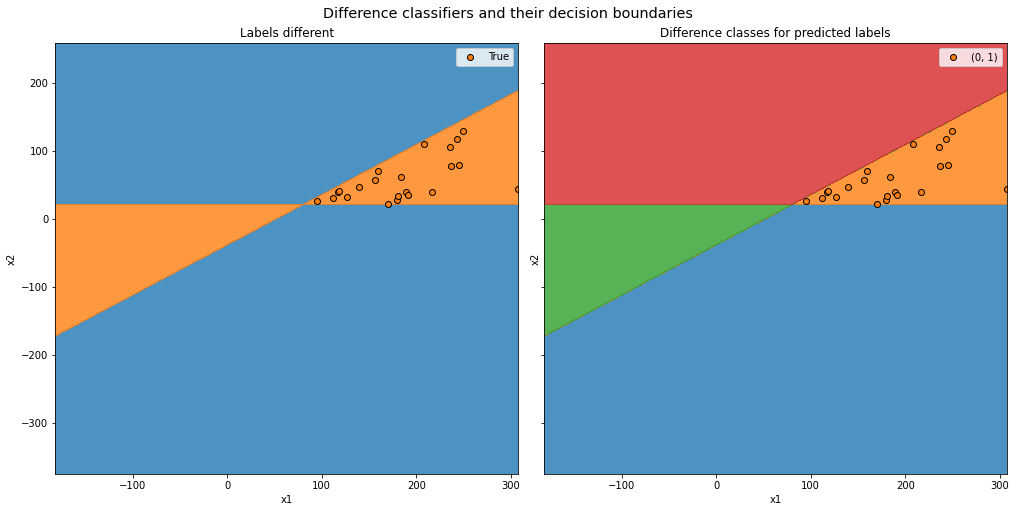

In [56]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

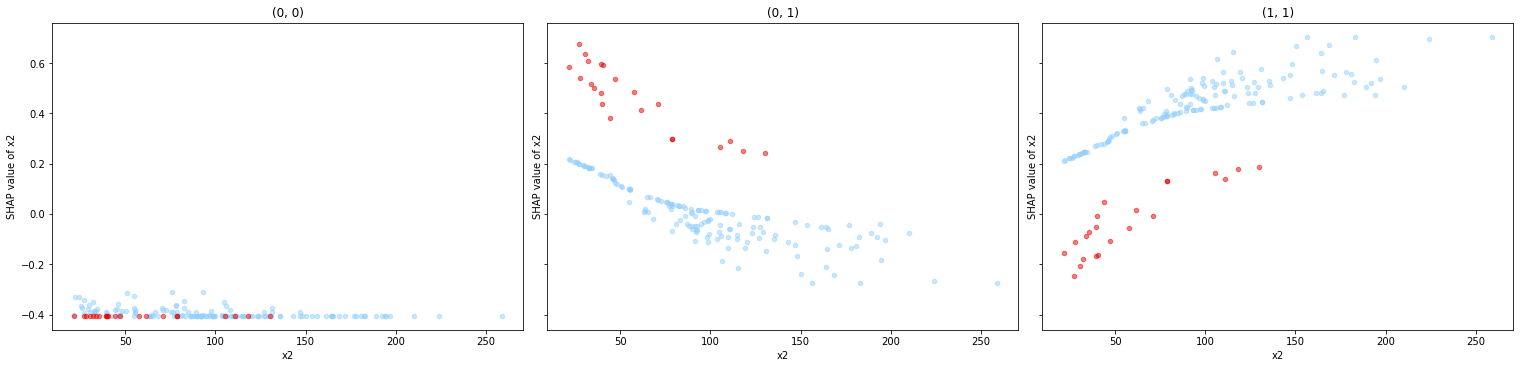

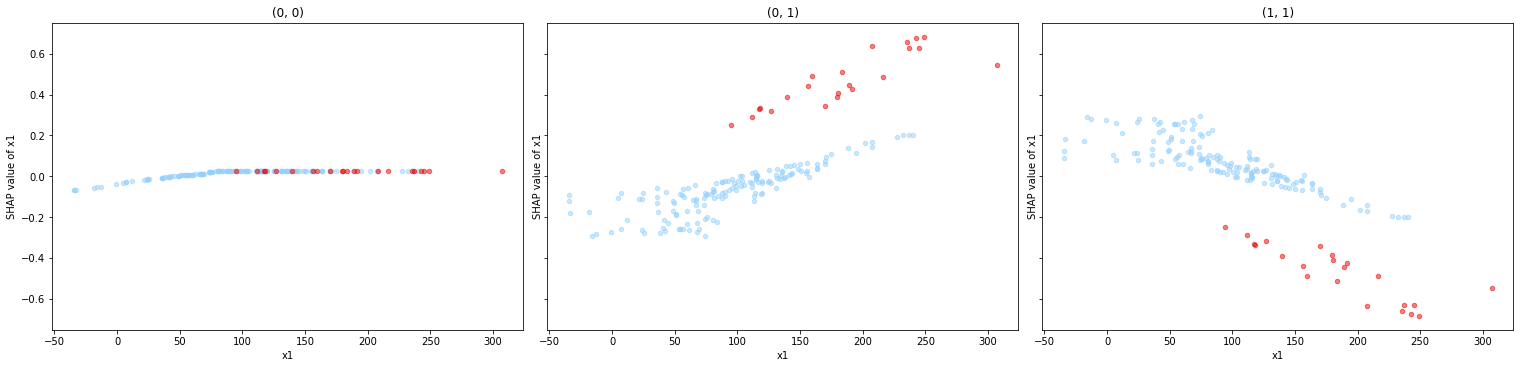

In [57]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [59]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,22.000000,22.000000
mean,9.979408,57.725000,57.725000
std,117.978412,32.546365,32.546365
min,-374.445022,21.713221,21.713221
25%,-59.339309,34.183800,34.183800
50%,34.019343,42.208430,42.208430
75%,93.596696,76.548554,76.548554
max,258.940851,130.025070,130.025070


In [60]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,22.000000,22.000000
mean,84.138769,184.481336,184.481336
std,77.917955,54.563787,54.563787
min,-181.190181,94.553614,94.553614
25%,35.786394,143.743566,143.743566
50%,83.158128,182.078051,182.078051
75%,131.776480,230.714859,230.714859
max,307.157526,307.157526,307.157526


In [58]:
node.test(x2=189)

,before,after
"(0, 1)",22.0,NaN
"(1, 1)",NaN,22.0


In [39]:
node.test(x1=81)

,before,after
"(0, 1)",22.0,NaN
"(1, 1)",NaN,22.0


### Node RLL

In [63]:
node = node.get_left()

RLL
(0, 1)    6
dtype: int64


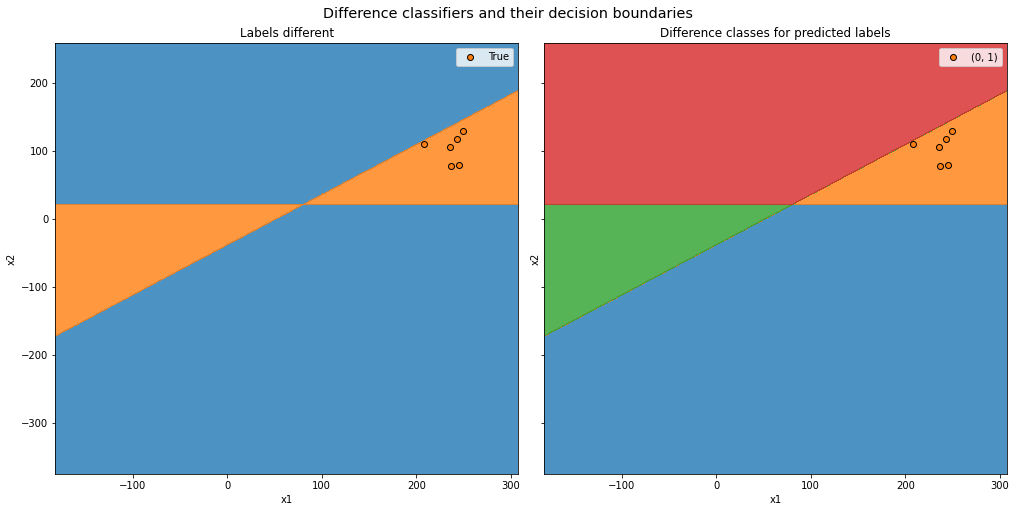

In [64]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

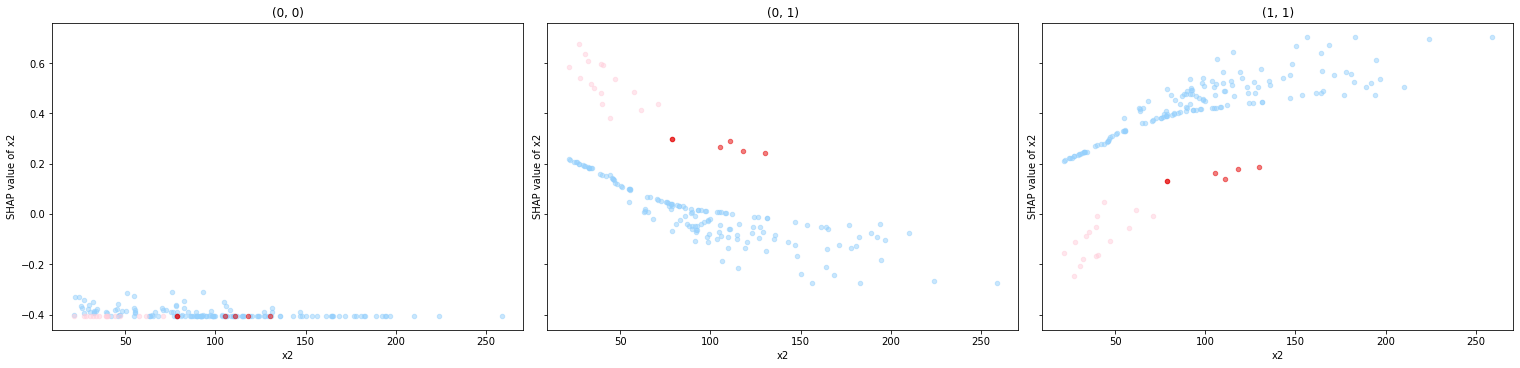

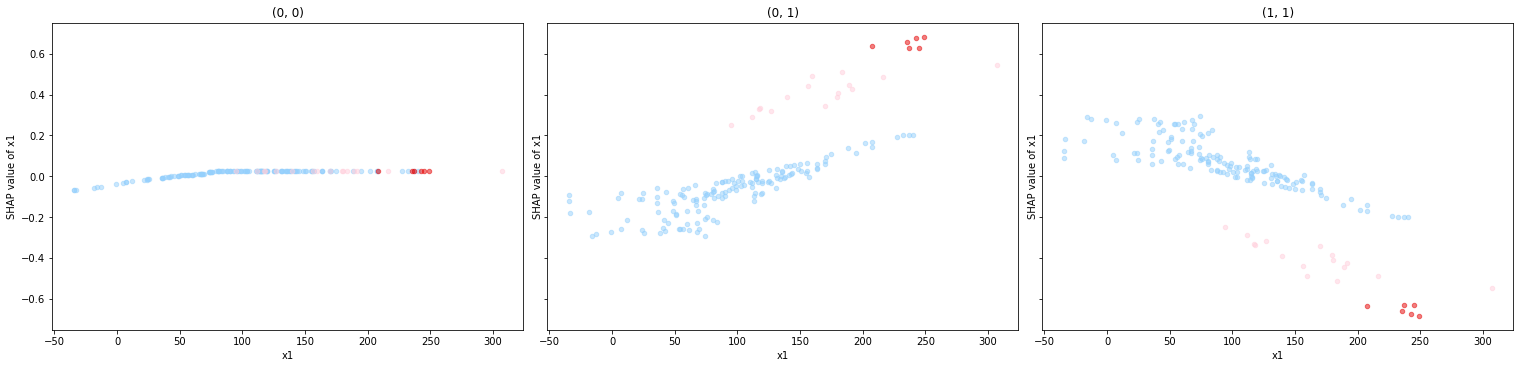

In [66]:
for feature in global_feature_order:
    node.parent.parent.plot_feature(feature, focus=node, alpha=0.5)

In [76]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,6.000000,6.000000
mean,9.979408,103.606970,103.606970
std,117.978412,21.081502,21.081502
min,-374.445022,78.445251,78.445251
25%,-59.339309,85.359943,85.359943
50%,34.019343,108.102038,108.102038
75%,93.596696,116.416644,116.416644
max,258.940851,130.025070,130.025070


In [77]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,6.000000,6.000000
mean,84.138769,236.170330,236.170330
std,77.917955,14.760360,14.760360
min,-181.190181,207.880114,207.880114
25%,35.786394,235.855637,235.855637
50%,83.158128,239.684300,239.684300
75%,131.776480,244.535506,244.535506
max,307.157526,249.041276,249.041276


In [87]:
node.test(x2=21)

,before,after
"(0, 0)",NaN,6.0
"(0, 1)",6.0,NaN


In [96]:
node.test(x2=146)

,before,after
"(0, 1)",6.0,NaN
"(1, 1)",NaN,6.0


In [111]:
node.test(x1=158)

,before,after
"(0, 1)",6.0,NaN
"(1, 1)",NaN,6.0


### Node RLR

In [112]:
node = node.parent.get_right()

RLR
(0, 1)    16
dtype: int64


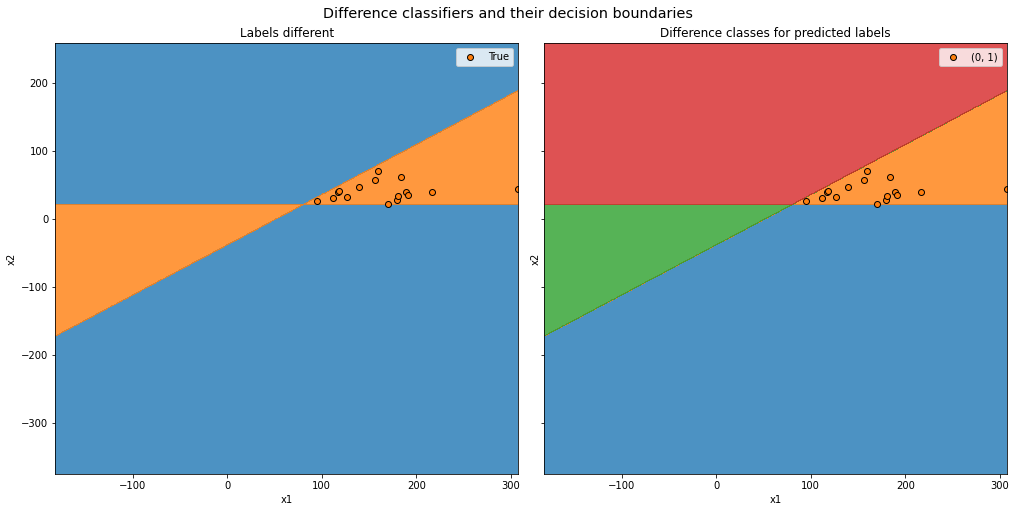

In [68]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

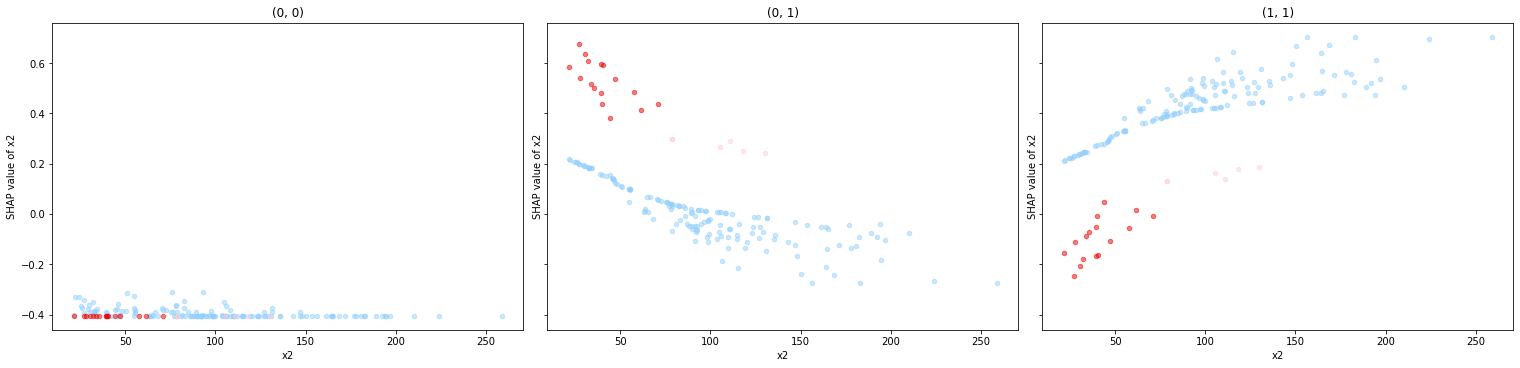

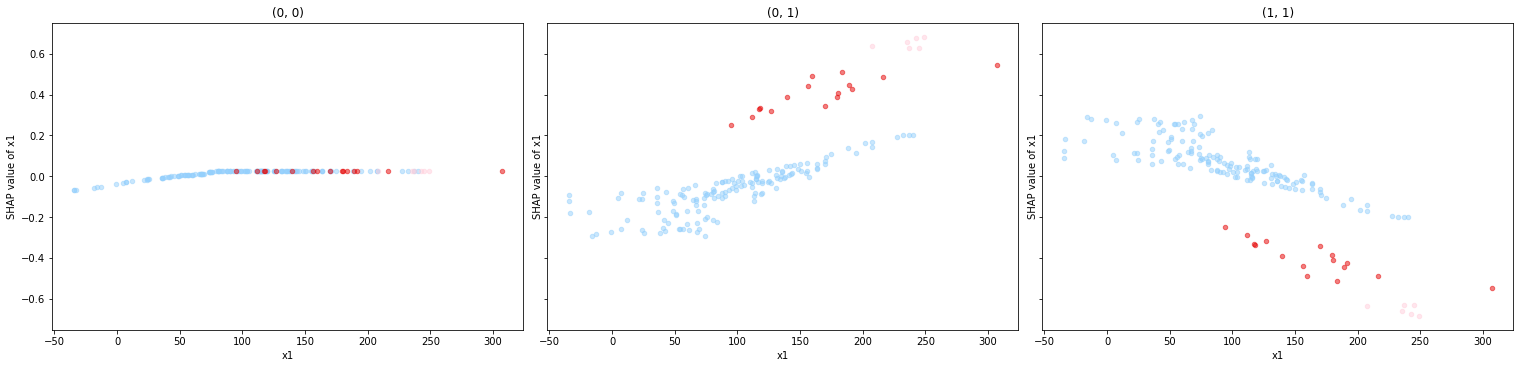

In [69]:
for feature in global_feature_order:
    node.parent.parent.plot_feature(feature, focus=node, alpha=0.5)

In [70]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,16.000000,16.000000
mean,9.979408,40.519261,40.519261
std,117.978412,13.303897,13.303897
min,-374.445022,21.713221,21.713221
25%,-59.339309,31.755615,31.755615
50%,34.019343,39.200363,39.200363
75%,93.596696,44.758305,44.758305
max,258.940851,70.858463,70.858463


In [115]:
node.test(x2=21)

,before,after
"(0, 0)",NaN,16.0
"(0, 1)",16.0,NaN


In [117]:
node.test(x2=189)

,before,after
"(0, 1)",16.0,NaN
"(1, 1)",NaN,16.0


In [119]:
node.test(x1=81)

,before,after
"(0, 1)",16.0,NaN
"(1, 1)",NaN,16.0


## Clustering of Class $(1, 0)$ SHAP Values

In [120]:
node, Z = make_clustering(comparer, explanations.mclass_diff.labels, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])

root
(1, 1)    149
(0, 0)    114
(0, 1)     22
(1, 0)     15
dtype: int64


### Root Node

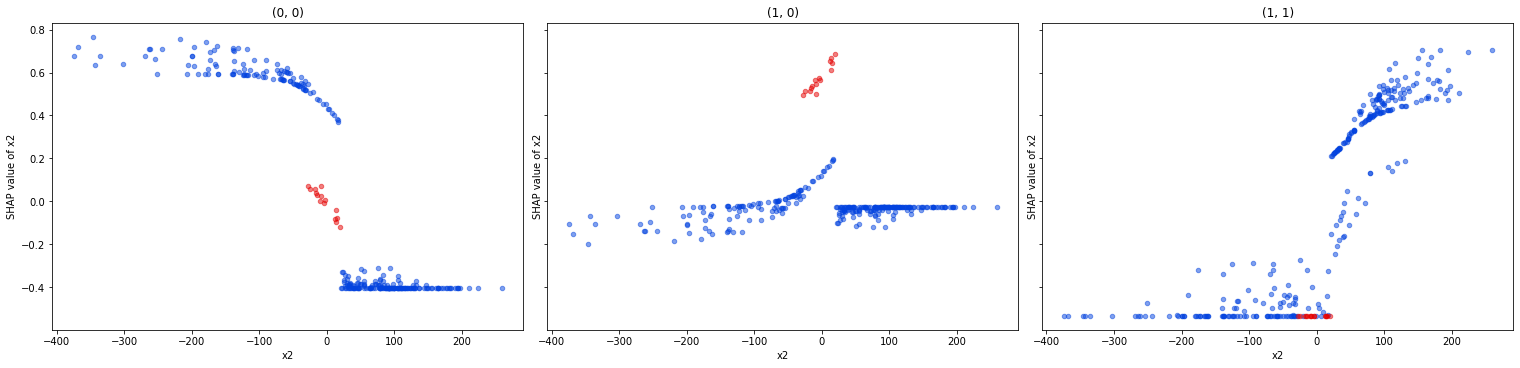

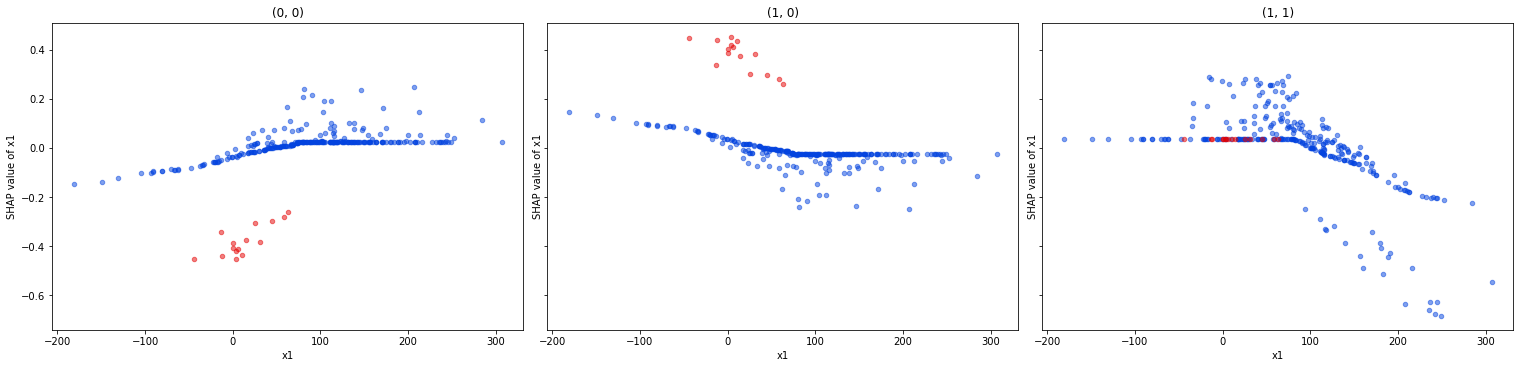

In [121]:
for feature in global_feature_order:
    node.plot_feature(feature, alpha=0.5)

In [122]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,300.000000,15.000000
mean,84.138769,84.138769,12.946593
std,77.917955,77.917955,28.313761
min,-181.190181,-181.190181,-43.736132
25%,35.786394,35.786394,0.642367
50%,83.158128,83.158128,5.688469
75%,131.776480,131.776480,28.475516
max,307.157526,307.157526,62.966519


In [123]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,300.000000,15.000000
mean,9.979408,9.979408,-4.305304
std,117.978412,117.978412,15.503006
min,-374.445022,-374.445022,-27.904182
25%,-59.339309,-59.339309,-15.446251
50%,34.019343,34.019343,-8.744852
75%,93.596696,93.596696,12.789271
max,258.940851,258.940851,19.245562


### Node R

In [124]:
node = node.get_right()

R
(0, 0)    114
(1, 0)     15
dtype: int64


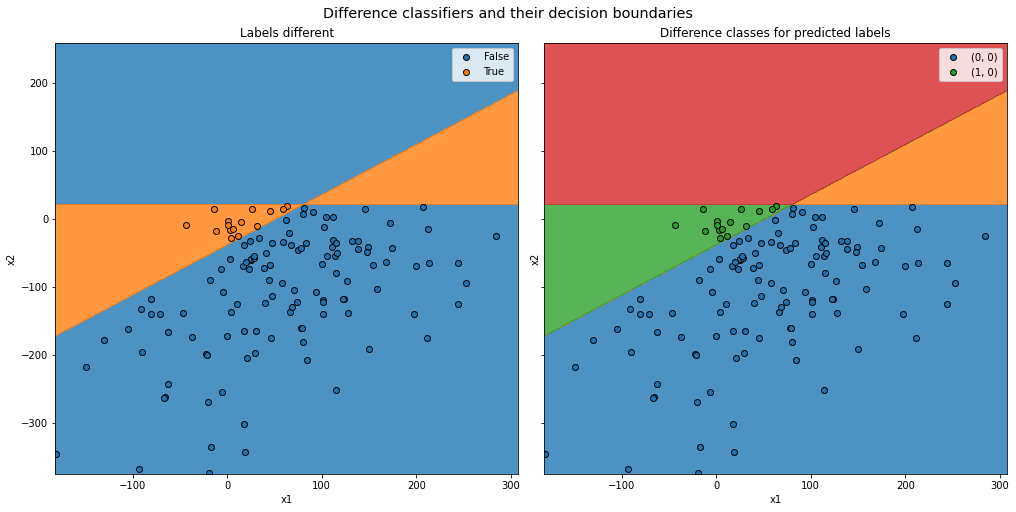

In [125]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

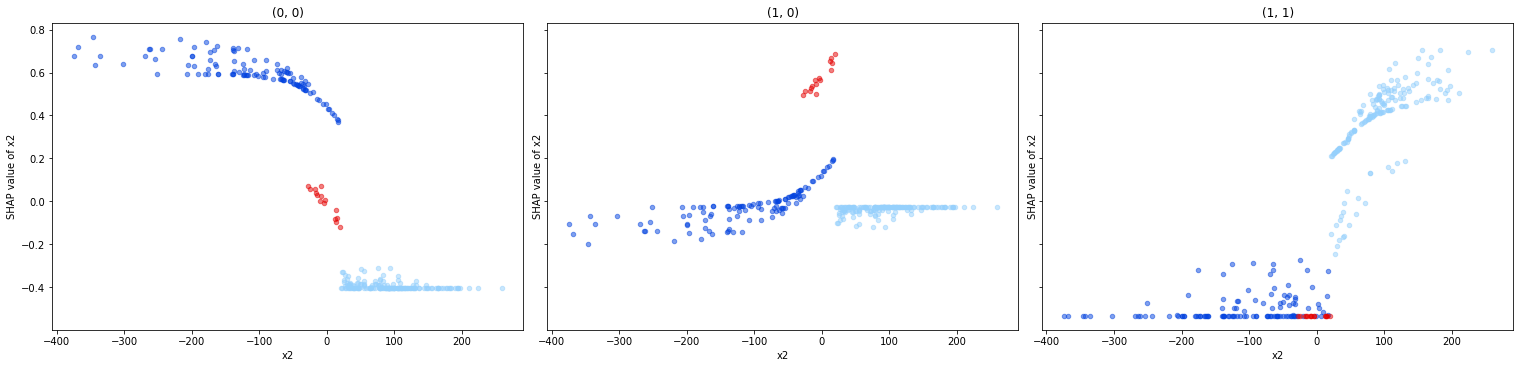

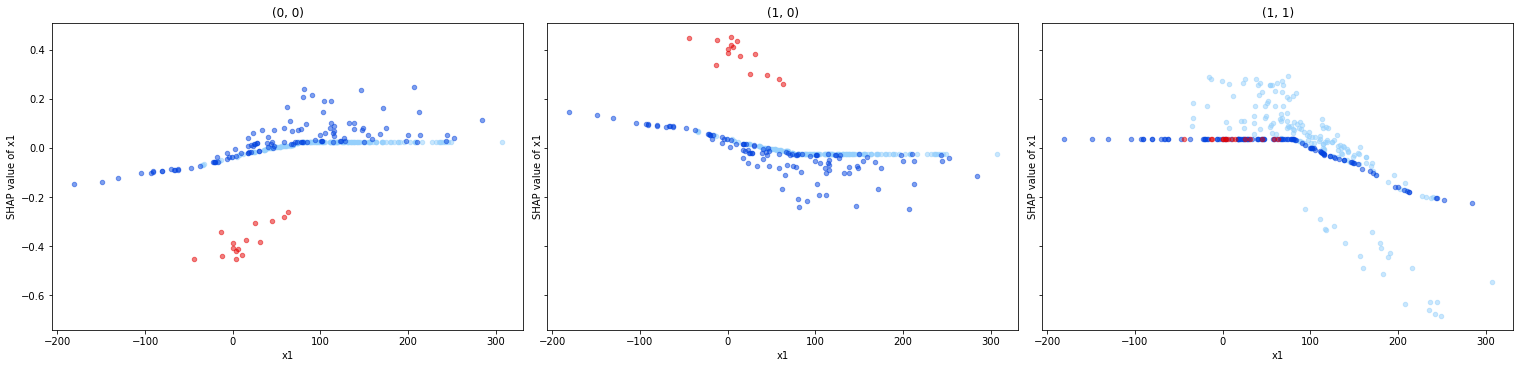

In [136]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [137]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,129.000000,15.000000
mean,9.979408,-99.773632,-4.305304
std,117.978412,90.345925,15.503006
min,-374.445022,-374.445022,-27.904182
25%,-59.339309,-140.051568,-15.446251
50%,34.019343,-71.524373,-8.744852
75%,93.596696,-32.811675,12.789271
max,258.940851,19.245562,19.245562


In [141]:
node.test(x2=22)

,before,after
"(1, 0)",15.0,NaN
"(1, 1)",NaN,15.0


### Node RL

In [142]:
node = node.get_left()

RL
(1, 0)    15
dtype: int64


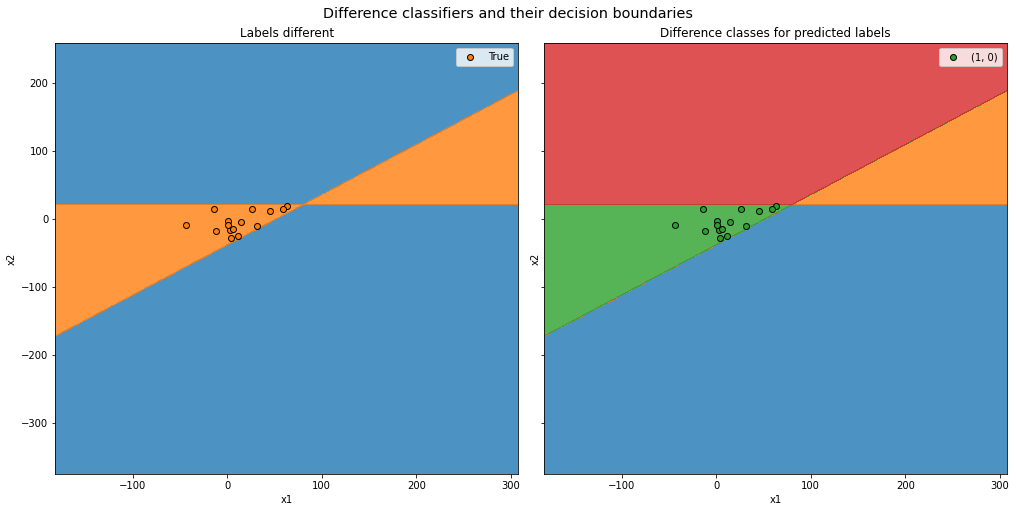

In [128]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

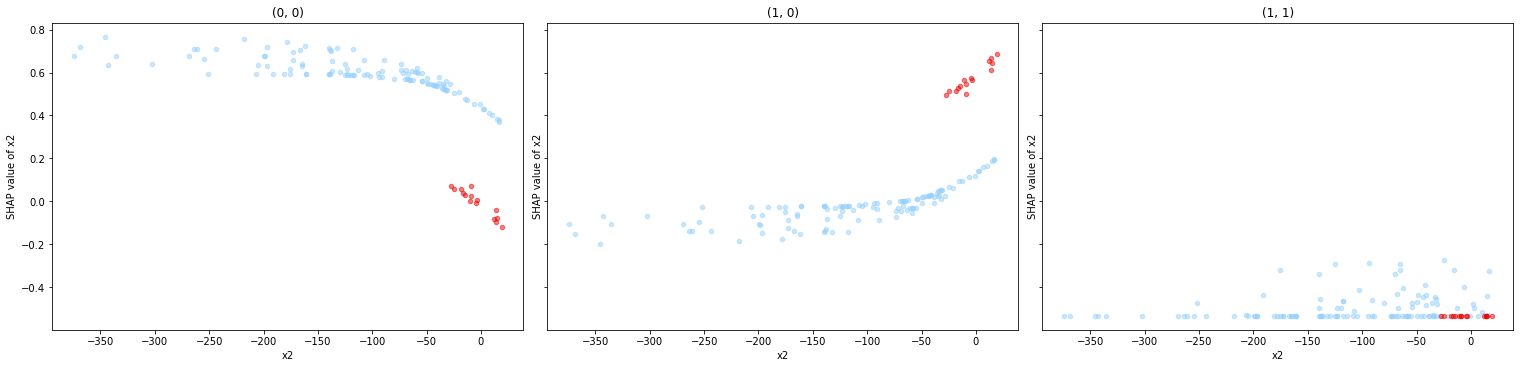

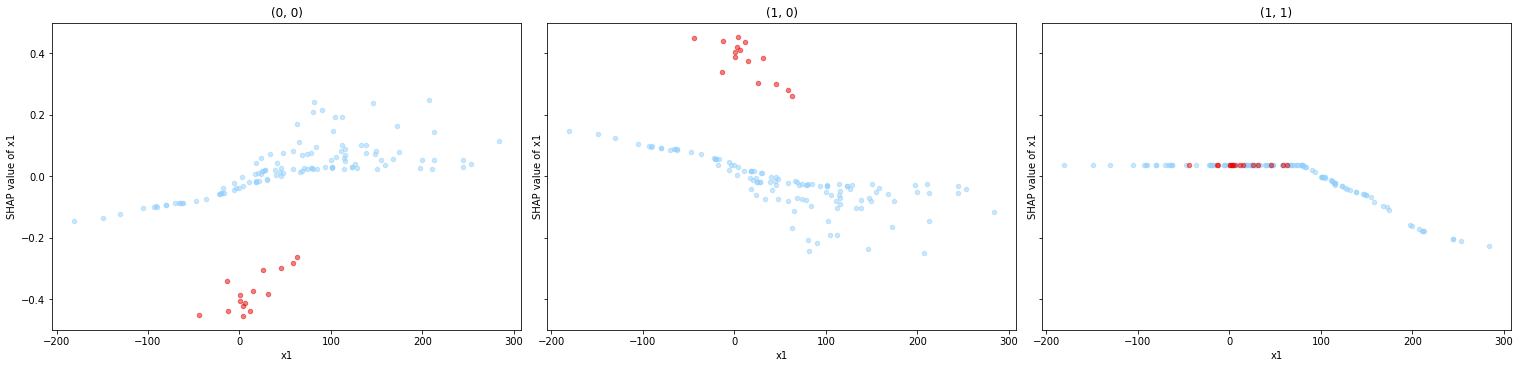

In [143]:
for feature in global_feature_order:
    node.parent.plot_feature(feature, focus=node, alpha=0.5)

In [144]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,15.000000,15.000000
mean,9.979408,-4.305304,-4.305304
std,117.978412,15.503006,15.503006
min,-374.445022,-27.904182,-27.904182
25%,-59.339309,-15.446251,-15.446251
50%,34.019343,-8.744852,-8.744852
75%,93.596696,12.789271,12.789271
max,258.940851,19.245562,19.245562


In [145]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,15.000000,15.000000
mean,84.138769,12.946593,12.946593
std,77.917955,28.313761,28.313761
min,-181.190181,-43.736132,-43.736132
25%,35.786394,0.642367,0.642367
50%,83.158128,5.688469,5.688469
75%,131.776480,28.475516,28.475516
max,307.157526,62.966519,62.966519


In [183]:
node.test(x2=22)

,before,after
"(1, 0)",15.0,NaN
"(1, 1)",NaN,15.0


In [158]:
node.test(x2=-71)

,before,after
"(0, 0)",NaN,15.0
"(1, 0)",15.0,NaN


In [170]:
node.test(x1=78)

,before,after
"(0, 0)",NaN,15.0
"(1, 0)",15.0,NaN


### Node RLL

In [184]:
node = node.get_left()

RLL
(1, 0)    5
dtype: int64


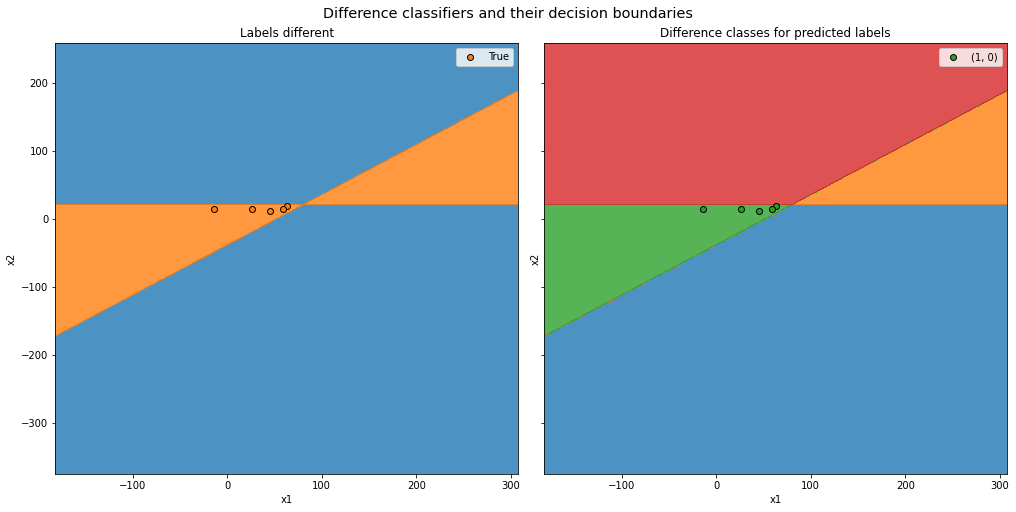

In [131]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

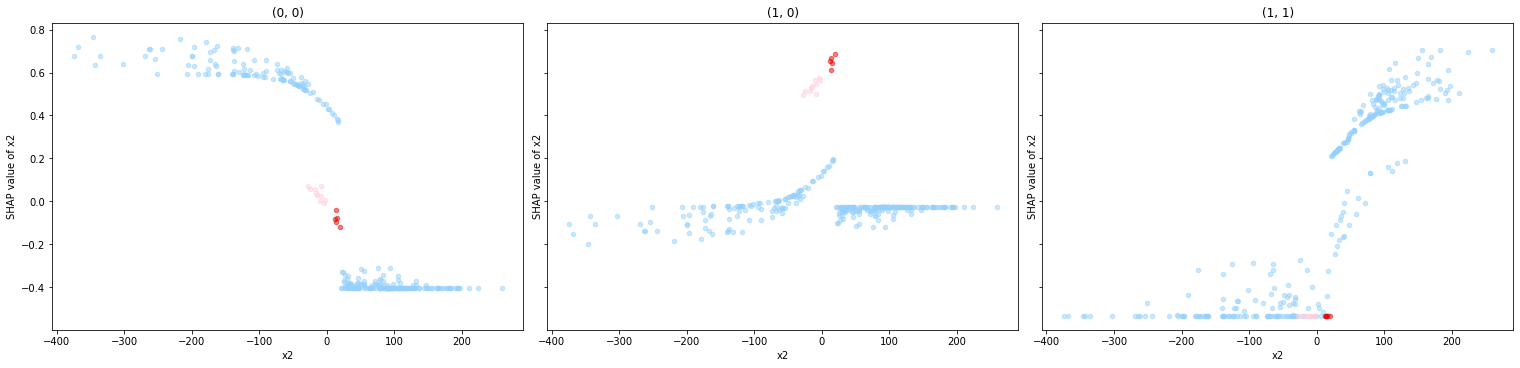

In [175]:
node.parent.parent.parent.plot_feature('x2', focus=node, alpha=0.5)

In [177]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,5.000000,5.000000
mean,9.979408,14.794835,14.794835
std,117.978412,2.799090,2.799090
min,-374.445022,11.625024,11.625024
25%,-59.339309,13.953518,13.953518
50%,34.019343,13.992579,13.992579
75%,93.596696,15.157494,15.157494
max,258.940851,19.245562,19.245562


In [188]:
node.test(x2=22)

,before,after
"(1, 0)",5.0,NaN
"(1, 1)",NaN,5.0


In [199]:
node.test(x2=-49)

,before,after
"(0, 0)",NaN,5.0
"(1, 0)",5.0,NaN


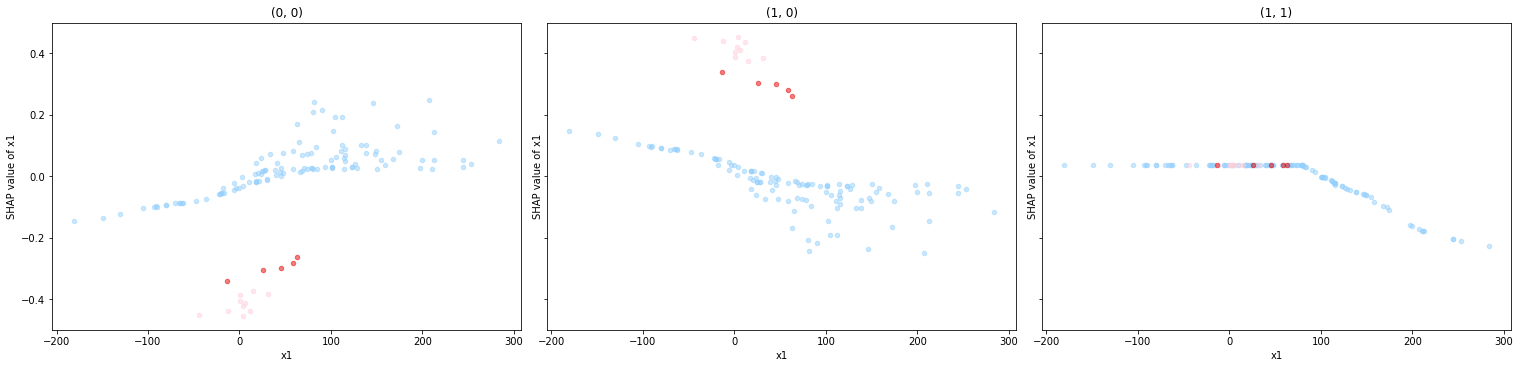

In [176]:
node.parent.parent.plot_feature('x1', focus=node, alpha=0.5)

In [178]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,5.000000,5.000000
mean,84.138769,35.818892,35.818892
std,77.917955,31.189422,31.189422
min,-181.190181,-13.608548,-13.608548
25%,35.786394,25.815989,25.815989
50%,83.158128,45.255411,45.255411
75%,131.776480,58.665090,58.665090
max,307.157526,62.966519,62.966519


In [202]:
node.test(x1=78)

,before,after
"(0, 0)",NaN,5.0
"(1, 0)",5.0,NaN


### Node RLR

In [203]:
node = node.parent.get_right()

RLR
(1, 0)    10
dtype: int64


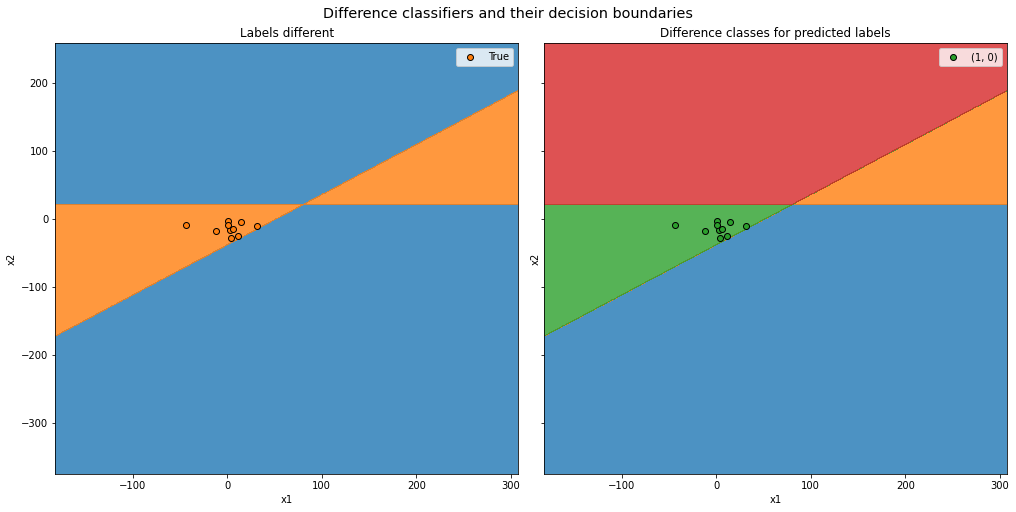

In [133]:
comparer.plot_decision_boundaries(node.shap_values.data, xlim=xlim, ylim=ylim)

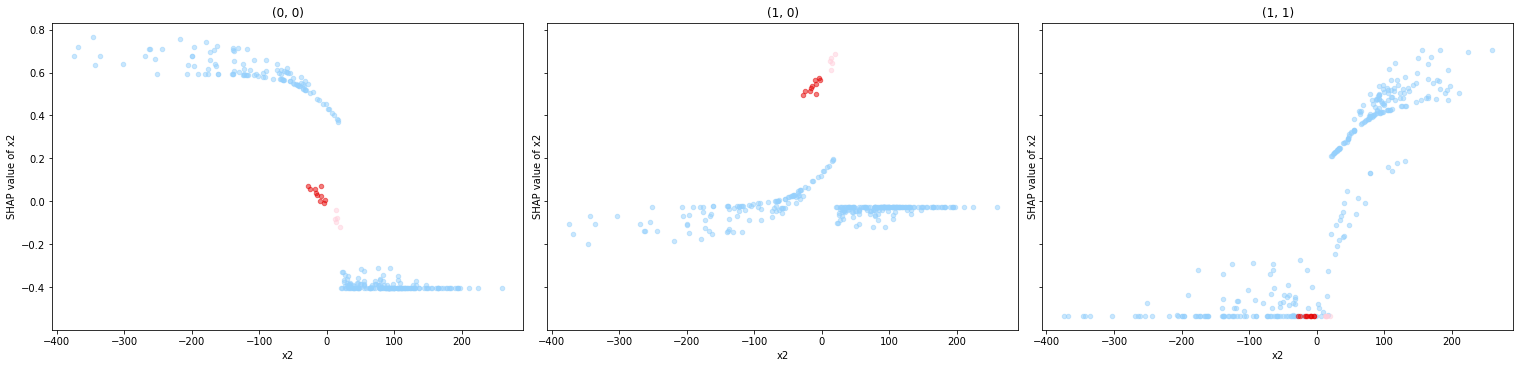

In [204]:
node.parent.parent.parent.plot_feature('x2', focus=node, alpha=0.5)

In [205]:
node.describe_feature('x2')

,global,local-all,local-diff
count,300.000000,10.000000,10.000000
mean,9.979408,-13.855374,-13.855374
std,117.978412,8.146916,8.146916
min,-374.445022,-27.904182,-27.904182
25%,-59.339309,-17.629784,-17.629784
50%,34.019343,-12.401446,-12.401446
75%,93.596696,-8.830815,-8.830815
max,258.940851,-3.454652,-3.454652


In [212]:
node.test(x2=22)

,before,after
"(1, 0)",10.0,NaN
"(1, 1)",NaN,10.0


In [214]:
node.test(x2=-71)

,before,after
"(0, 0)",NaN,10.0
"(1, 0)",10.0,NaN


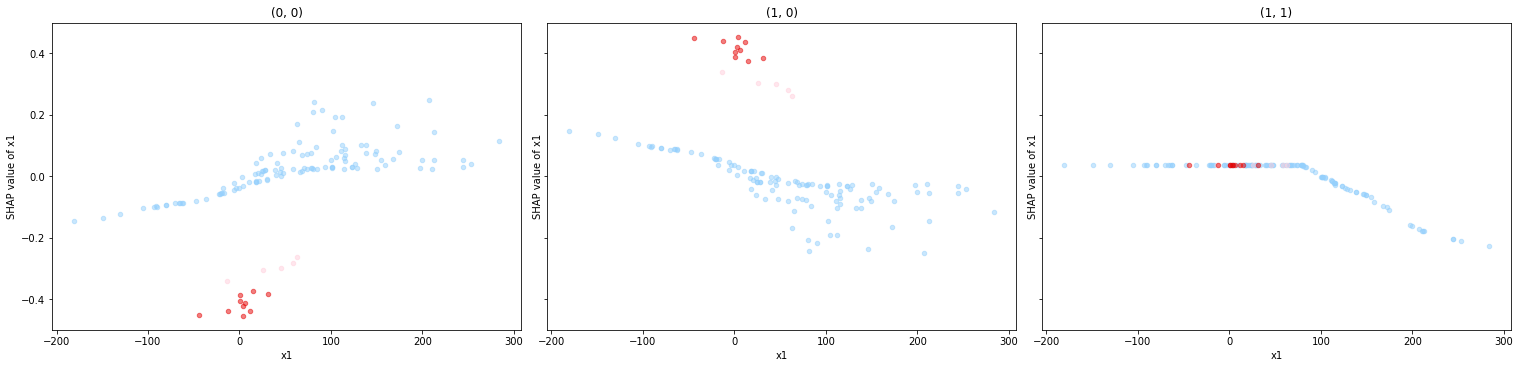

In [208]:
node.parent.parent.plot_feature('x1', focus=node, alpha=0.5)

In [209]:
node.describe_feature('x1')

,global,local-all,local-diff
count,300.000000,10.000000,10.000000
mean,84.138769,1.510444,1.510444
std,77.917955,19.461304,19.461304
min,-181.190181,-43.736132,-43.736132
25%,35.786394,0.612230,0.612230
50%,83.158128,3.583049,3.583049
75%,131.776480,9.821305,9.821305
max,307.157526,31.135043,31.135043


In [224]:
node.test(x1=48)

,before,after
"(0, 0)",NaN,10.0
"(1, 0)",10.0,NaN
